In [1]:
import re
import numpy as np
from sklearn import grid_search, svm

/home/bombonjane/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/bombonjane/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
with open('anna.txt', encoding='utf-8') as f:
    anna = f.read()
with open('sonets.txt', encoding='utf-8') as f:
    sonets = f.read()
anna = anna.lower()
sonets = sonets.lower()
anna_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', anna)
sonet_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', sonets)

In [3]:
def vowels (sentence):#количество гласных в предложении
	vow = u'ёуеыаоэяиюe'
	return sum(1 for i in sentence if i in vow)

def letters(sentence):#количество букв в предложении    
	let = u'ёйцукенгшщзхъфывапролджэячсмитьбю'    
	return sum(1 for j in sentence if j in let)

def unique_letters(sentence):#количество различных букв в предложении
	let = u'ёйцукенгшщзхъфывапролджэячсмитьбю'
	return len(set([k for k in sentence if k in let]))

def median_letters_word(sentence):#медиана числа букв в слове
	return np.median([len(word) for word in sentence.split()])

def median_vowels_word(sentence):#медиана числа гласных в слове
	return np.median([vowels(word) for word in sentence.split()])

In [4]:
anna_data = [(1, vowels(sentence),letters(sentence), unique_letters(sentence), median_letters_word(sentence), median_vowels_word(sentence)) for sentence in anna_sentences]
sonet_data = [(2, vowels(sentence),letters(sentence), unique_letters(sentence),  median_letters_word(sentence), median_vowels_word(sentence)) for sentence in sonet_sentences]
anna_data = np.array(anna_data)
sonet_data = np.array(sonet_data)
anna_data = np.nan_to_num(anna_data)
sonet_data = np.nan_to_num(sonet_data)

/home/bombonjane/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bombonjane/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


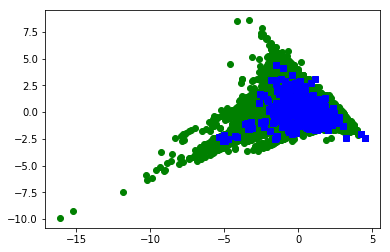

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import mlab
data = np.vstack((anna_data, sonet_data))
p = mlab.PCA(data[:, 1:], True)
N = len(anna_data)
plt.figure()
plt.plot(p.Y[:N,0], p.Y[:N,1], 'og', p.Y[N:,0], p.Y[N:,1], 'sb')
plt.show()

In [6]:
parameters = {'C': (.1, .5, 1.0, 1.5, 1.7, 2.0)}
gs = grid_search.GridSearchCV(svm.LinearSVC(), parameters)
gs.fit(data[:, 1:], data[:, 0])
print('Best result is ', gs.best_score_)
print('Best C is', gs.best_estimator_.C)

Best result is  0.9397648293045416
Best C is 0.1


In [7]:
clf = svm.LinearSVC(C=gs.best_estimator_.C)
clf.fit(data[::2, 1:], data[::2, 0])

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
wrong = 0
for obj in data[1::2, :]:
    label = clf.predict(obj[1:].reshape(1, -1))
    if label != obj[0]:
        print('Пример ошибки машины: class = ', obj[0], ', label = ', label, ', экземпляр ', obj[1:])
        wrong += 1
print (u'Количество ошибок: ', wrong)

Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 21.  46.  22.   4.   1.]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [  42.  104.   26.    5.    2.]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 20.  50.  23.   5.   3.]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 20.   50.   20.    6.5   2. ]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [  6.   16.   12.    3.5   1. ]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 20.  49.  20.   5.   2.]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 20.   53.   21.    5.5   2. ]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 21.  48.  16.   5.   2.]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 21.   60.   24.    4.5   1.5]
Пример ошибки машины: class =  2.0 , label =  [ 1.] , экземпляр  [ 22.   55.   22.    4.5   1. ]
Пример ошибки машины: class =  2.0 , label =  [ 1.

In [10]:
#похоже, что классификатор в ряде случаев ошибочно приписывает сонеты к классу Карениной